In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [32]:
df = pd.read_csv('Titanic-Dataset-Train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,331,332,0,1,1,1.215947,0,0,-0.074583,False,False,True
1,733,734,0,2,1,-0.515526,0,0,-0.386671,False,False,True
2,382,383,0,3,1,0.177063,0,0,-0.488854,False,False,True
3,704,705,0,3,1,-0.284663,1,0,-0.490280,False,False,True
4,813,814,0,3,0,-1.823750,4,2,-0.018709,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
707,106,107,1,3,0,-0.669435,0,0,-0.494391,False,False,True
708,270,271,0,1,1,0.000000,0,0,-0.024246,False,False,True
709,860,861,0,3,1,0.869652,2,0,-0.364355,False,False,True
710,435,436,1,1,0,-1.208115,1,2,1.767741,False,False,True


In [33]:
df['Survived'].value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

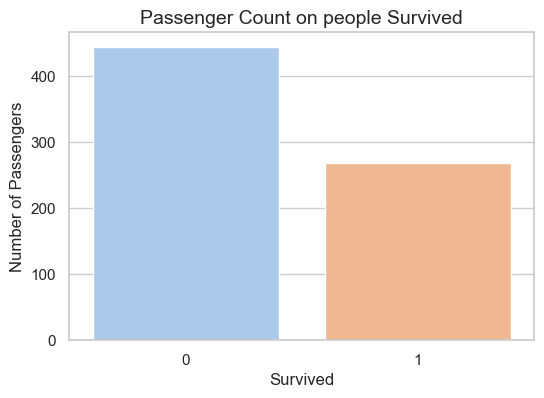

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)

plt.title('Passenger Count on people Survived', fontsize=14)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()


In [35]:
# Separate majority and minority classes
df_majority = df[df['Survived'] == 0]
df_majority

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,331,332,0,1,1,1.215947,0,0,-0.074583,False,False,True
1,733,734,0,2,1,-0.515526,0,0,-0.386671,False,False,True
2,382,383,0,3,1,0.177063,0,0,-0.488854,False,False,True
3,704,705,0,3,1,-0.284663,1,0,-0.490280,False,False,True
4,813,814,0,3,0,-1.823750,4,2,-0.018709,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
704,20,21,0,2,1,0.407926,0,0,-0.124920,False,False,True
706,71,72,0,3,0,-1.054207,5,2,0.295895,False,False,True
708,270,271,0,1,1,0.000000,0,0,-0.024246,False,False,True
709,860,861,0,3,1,0.869652,2,0,-0.364355,False,False,True


In [36]:
df_minority = df[df['Survived'] == 1]
df_minority

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
9,55,56,1,1,1,0.000000,0,0,0.066360,False,False,True
10,865,866,1,2,0,0.946606,0,0,-0.386671,False,False,True
14,81,82,1,3,1,-0.053800,0,0,-0.457142,False,False,True
15,259,260,1,2,0,1.562241,0,1,-0.124920,False,False,True
16,486,487,1,1,0,0.407926,1,0,1.163700,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
698,458,459,1,2,0,1.562241,0,0,-0.437007,False,False,True
699,330,331,1,3,0,0.000000,2,0,-0.180290,False,True,False
705,700,701,1,1,0,-0.900298,1,0,3.932723,True,False,False
707,106,107,1,3,0,-0.669435,0,0,-0.494391,False,False,True


In [37]:
df_minority_upsampled = resample(
    df_minority,
    replace=True,                # sample with replacement
    n_samples=len(df_majority),  # match number of majority class
    random_state=42              # for reproducibility
)
df_minority_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
253,184,185,1,3,0,-1.977659,0,2,-0.204955,False,False,True
271,125,126,1,3,1,-1.362024,1,0,-0.422074,True,False,False
191,879,880,1,1,0,2.023967,0,1,1.025945,True,False,False
497,267,268,1,3,1,-0.361618,1,0,-0.491874,False,False,True
52,742,743,1,1,0,-0.669435,2,2,4.634417,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
578,47,48,1,3,0,0.000000,0,0,-0.492378,False,True,False
309,576,577,1,2,0,0.330972,0,0,-0.386671,False,False,True
340,399,400,1,2,0,-0.130754,0,0,-0.393718,False,False,True
429,151,152,1,1,0,-0.592481,1,0,0.692549,False,False,True


In [38]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,331,332,0,1,1,1.215947,0,0,-0.074583,False,False,True
1,733,734,0,2,1,-0.515526,0,0,-0.386671,False,False,True
2,382,383,0,3,1,0.177063,0,0,-0.488854,False,False,True
3,704,705,0,3,1,-0.284663,1,0,-0.490280,False,False,True
4,813,814,0,3,0,-1.823750,4,2,-0.018709,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
578,47,48,1,3,0,0.000000,0,0,-0.492378,False,True,False
309,576,577,1,2,0,0.330972,0,0,-0.386671,False,False,True
340,399,400,1,2,0,-0.130754,0,0,-0.393718,False,False,True
429,151,152,1,1,0,-0.592481,1,0,0.692549,False,False,True


In [39]:
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,789,790,0,1,1,1.254424,0,0,0.946246,True,False,False
1,87,88,0,3,1,0.000000,0,0,-0.486337,False,False,True
2,355,356,0,3,1,-0.130754,0,0,-0.457142,False,False,True
3,313,314,0,3,1,-0.130754,0,0,-0.489442,False,False,True
4,356,357,1,1,0,-0.592481,0,1,0.458986,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
883,628,629,0,3,1,-0.284663,0,0,-0.489442,False,False,True
884,452,453,0,1,1,0.023154,0,0,-0.089684,True,False,False
885,855,856,1,3,0,-0.900298,0,1,-0.460162,False,False,True
886,214,215,0,3,1,0.000000,1,0,-0.492378,False,True,False


In [40]:
df_upsampled['Survived'].value_counts()

Survived
0    444
1    444
Name: count, dtype: int64

In [44]:
df = pd.read_csv('Titanic-Dataset-Train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,331,332,0,1,1,1.215947,0,0,-0.074583,False,False,True
1,733,734,0,2,1,-0.515526,0,0,-0.386671,False,False,True
2,382,383,0,3,1,0.177063,0,0,-0.488854,False,False,True
3,704,705,0,3,1,-0.284663,1,0,-0.490280,False,False,True
4,813,814,0,3,0,-1.823750,4,2,-0.018709,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
707,106,107,1,3,0,-0.669435,0,0,-0.494391,False,False,True
708,270,271,0,1,1,0.000000,0,0,-0.024246,False,False,True
709,860,861,0,3,1,0.869652,2,0,-0.364355,False,False,True
710,435,436,1,1,0,-1.208115,1,2,1.767741,False,False,True


In [45]:
df['Survived'].value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [46]:
df_majority = df[df['Survived'] == 0]
df_minority = df[df['Survived'] == 1]

In [47]:
df_majority_downsampled = resample(
    df_majority,
    replace=False,                # sample without replacement
    n_samples=len(df_minority),   # match number of minority class
    random_state=42               # for reproducibility
)

In [48]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [49]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
df_downsampled['Survived'].value_counts()

Survived
0    268
1    268
Name: count, dtype: int64

In [51]:
X = df.drop(['Survived'], axis=1)  # Features
y = df['Survived']                                   # Target

In [52]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
y.value_counts()


Survived
0    444
1    268
Name: count, dtype: int64

In [54]:
y_resampled.value_counts()

Survived
0    444
1    444
Name: count, dtype: int64

In [55]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.Series(y_resampled, name='Survived')], axis=1)

In [57]:
df_resampled

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,331,332,1,1,1.215947,0,0,-0.074583,False,False,True,0
1,733,734,2,1,-0.515526,0,0,-0.386671,False,False,True,0
2,382,383,3,1,0.177063,0,0,-0.488854,False,False,True,0
3,704,705,3,1,-0.284663,1,0,-0.490280,False,False,True,0
4,813,814,3,0,-1.823750,4,2,-0.018709,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
883,600,601,1,0,-0.432719,1,0,-0.102999,False,False,True,1
884,390,391,1,1,0.441765,0,1,1.683356,False,False,True,1
885,469,470,2,0,-1.946920,1,0,-0.278715,True,False,False,1
886,270,271,1,0,0.283906,0,0,1.299679,False,True,True,1


In [62]:
synthetic_samples = df_resampled.iloc[len(y):, :]

In [63]:
synthetic_samples

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
712,487,488,2,1,-1.282875,1,0,0.052845,True,False,True,1
713,144,145,3,0,-0.322505,0,0,-0.410817,False,False,True,1
714,508,509,2,0,-0.354801,0,0,-0.015303,False,True,True,1
715,288,289,2,0,0.508212,0,0,-0.416780,False,True,True,1
716,98,99,2,0,0.294070,0,0,-0.196724,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
883,600,601,1,0,-0.432719,1,0,-0.102999,False,False,True,1
884,390,391,1,1,0.441765,0,1,1.683356,False,False,True,1
885,469,470,2,0,-1.946920,1,0,-0.278715,True,False,False,1
886,270,271,1,0,0.283906,0,0,1.299679,False,True,True,1
